# Part 3

## 1.Data Preparation

### a. Load the dataset and preprocess

In [30]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


data = pd.read_csv('/content/drive/My Drive/winequality-red.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [32]:
data = data['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';', expand=True)

In [33]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [34]:
data.columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality'
]

In [35]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [36]:
data.dtypes

fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
dtype: object

In [37]:
data = data.apply(pd.to_numeric, errors='coerce')

In [38]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### b. Standardize the data

In [40]:
from sklearn.preprocessing import StandardScaler
X = data.drop('quality',axis = 1)
y = data['quality']

In [41]:
X.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [42]:
y.head(1)

0    5
Name: quality, dtype: int64

In [43]:
scaler = StandardScaler()

In [44]:
X = scaler.fit_transform(X)

### c. Split the data into a training set (80%) and a testing set (20%)

In [45]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2, random_state = 9)

## 2. Model design

### d. Design an artificial neural network

In [46]:
import tensorflow as tf
from tensorflow import keras

# Assuming 11 input features
input_dimension = 11

model = keras.models.Sequential([
    # Input layer with 11 neurons
    keras.layers.Dense(11, activation='relu', input_shape=(input_dimension,)),

    # First hidden layer with 11 neurons and ReLU activation
    keras.layers.Dense(11, activation='relu'),

    # Second hidden layer with 8 neurons and ReLU activation
    keras.layers.Dense(8, activation='relu'),

    # Output layer with a single neuron and no activation function (linear activation)
    keras.layers.Dense(1, activation=None)
])

# Compile the model (You can configure optimizer, loss, and metrics as needed)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Print model summary to review the architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 8)                 96        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### e. Model Configuration

In [47]:
history = model.fit(
    Xtrain, ytrain,
    batch_size=10,
    epochs=25,
    validation_split=0.1,  # 10% of training data for validation
    verbose=1  # Set to 1 for progress updates during training
)


Epoch 1/25
116/116 [==============================] - 6s 5ms/step - loss: 19.2116 - mean_absolute_error: 4.0812 - val_loss: 6.2358 - val_mean_absolute_error: 2.1124
Epoch 2/25
116/116 [==============================] - 0s 4ms/step - loss: 3.2350 - mean_absolute_error: 1.4216 - val_loss: 2.5822 - val_mean_absolute_error: 1.2336
Epoch 3/25
116/116 [==============================] - 0s 4ms/step - loss: 1.7969 - mean_absolute_error: 1.0396 - val_loss: 1.8090 - val_mean_absolute_error: 1.0414
Epoch 4/25
116/116 [==============================] - 0s 4ms/step - loss: 1.3450 - mean_absolute_error: 0.9005 - val_loss: 1.4655 - val_mean_absolute_error: 0.9500
Epoch 5/25
116/116 [==============================] - 0s 4ms/step - loss: 1.0948 - mean_absolute_error: 0.8118 - val_loss: 1.2933 - val_mean_absolute_error: 0.8966
Epoch 6/25
116/116 [==============================] - 0s 4ms/step - loss: 0.9491 - mean_absolute_error: 0.7603 - val_loss: 1.1956 - val_mean_absolute_error: 0.8623
Epoch 7/25
116/

### f. Model Evaluation

In [48]:
validation_mse = history.history['val_loss'][-1]
validation_mae = history.history['val_mean_absolute_error'][-1]

In [49]:
print(f'Validation MSE: {validation_mse:.4f}')
print(f'Validation MAE: {validation_mae:.4f}')

Validation MSE: 0.6431
Validation MAE: 0.6068


### g. Assess the trained model’s performance on the test set by computing MSE, MAE and R2. Report the values for MSE, MAE and R2

In [51]:
ypred = model.predict(Xtest)

10/10 [==============================] - 0s 2ms/step


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R^2 Score: {r2:.4f}')


Mean Squared Error (MSE): 0.4104
Mean Absolute Error (MAE): 0.5066
R^2 Score: 0.3030


### h. Visualization of loss curves

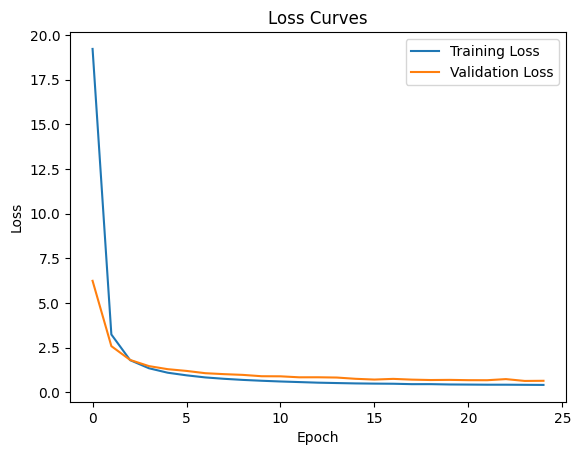

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### i. Scatter plot

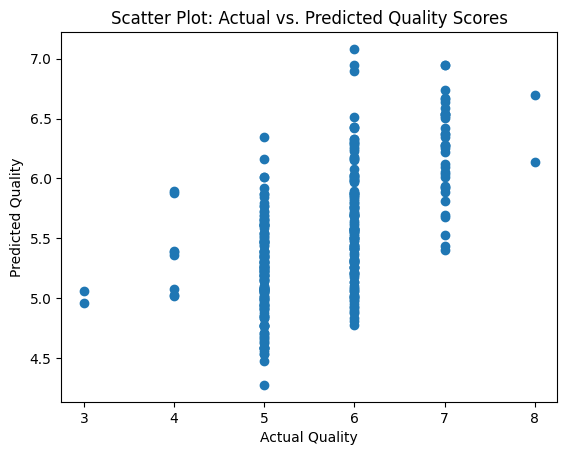

In [58]:
plt.scatter(ytest, ypred)
plt.title('Scatter Plot: Actual vs. Predicted Quality Scores')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()